In [1]:
# Python standard lib geographiclib
import geopy
import geopy.distance
from geographiclib.geodesic import Geodesic
from shapely.geometry import Point, Polygon
import geopandas

In [2]:
import folium
import datetime as dt

In [3]:
from pprint import pprint

In [4]:
# Plot list of coordinates
def plot_coordinates(coords_list):
    
    t0 = dt.datetime.now()
    # process to be measured
    
    # New York City Coordinates
    # NYC_COORD = [40.7128, -74.0059]
    # BERLIN_COORD = [52.5200, 13.4050]
    # //TODO: get the center of the farm polygon
    location = []
    for coord in coords_list[0]:
        location.append(round(coord, 4))
    print('-----------------')
    print('Location:')
    print(location)

    # Build map 
    location_map = folium.Map(location=location, zoom_start=20, 
    tiles='cartodbpositron', width=640, height=480)

    # Plot coordinates using comprehension list
    [folium.CircleMarker(coords_list[i], radius=0.05,
                    color='#0080bb', fill_color='#0080bb').add_to(location_map) 
    for i in range(len(coords_list))]
    print('-----------------')
    print('Amount of coordinates points: {}'.format(len(coords_list)))
    print('-----------------')
    print('Coordinates List:')
    pprint(coords_list)
    
    t1 = dt.datetime.now()
    print('-----------------')
    print('Total time: {} seconds'.format((t1 - t0).total_seconds()))
    # Display map in Jupyter
    return location_map

In [5]:
# coordinates_polygon = [[-33.982909978983756, 151.2465560781668],[-33.98303452845496, 151.24681357023223],[-33.98315018137193, 151.24674383279785],[-33.983021183877476, 151.24648634073242]]

# COMPLEX SHAPE
# coordinates_polygon = [
#             [52.510241624695496, 13.390088975429535],
#             [52.50990860465432, 13.390142619609833],
#             [52.50992166431132, 13.39032769203186],
#             [52.51009307194967, 13.390311598777771],
#             [52.51012735339714, 13.390738070011139],
#             [52.51003920104965, 13.390762209892273],
#             [52.51005552557178, 13.390976786613464],
#             [52.51016000236986, 13.39096337556839],
#             [52.51022366779688, 13.391033113002775],
#             [52.51028733313166, 13.390845358371735],
#             [52.51034120372754, 13.39041620492935],
# ]


# WEIRD TRIANGLE
coordinates_polygon = [ [40.731482464290394, -73.99888515472412],
                        [40.73139303364151, -73.99899244308472],
                        [40.73119384676431, -73.99904072284698],
                        [40.73113287107045, -73.99890661239624],
                        [40.731238562237635, -73.99834334850311],
]

# RECTANGULE
# coordinates_polygon = [
#             [52.51567243361647, 13.386374115943909],
#             [52.51567243361647, 13.387709856033325],
#             [52.516289417238696, 13.387709856033325],
#             [52.516289417238696, 13.386374115943909],
#             [52.51567243361647, 13.386374115943909]
# ]

plot_coordinates(coordinates_polygon)

-----------------
Location:
[40.7315, -73.9989]
-----------------
Amount of coordinates points: 5
-----------------
Coordinates List:
[[40.731482464290394, -73.99888515472412],
 [40.73139303364151, -73.99899244308472],
 [40.73119384676431, -73.99904072284698],
 [40.73113287107045, -73.99890661239624],
 [40.731238562237635, -73.99834334850311]]
-----------------
Total time: 0.005858 seconds


In [6]:
lats, lons = [], []
for i in coordinates_polygon:
    lats.append(i[0])
    lons.append(i[1])

coordinates_rectangle = [[min(lats), max(lons)],
                         [max(lats), max(lons)],
                         [max(lats), min(lons)],
                         [min(lats), min(lons)],
]

plot_coordinates(coordinates_rectangle)

-----------------
Location:
[40.7311, -73.9983]
-----------------
Amount of coordinates points: 4
-----------------
Coordinates List:
[[40.73113287107045, -73.99834334850311],
 [40.731482464290394, -73.99834334850311],
 [40.731482464290394, -73.99904072284698],
 [40.73113287107045, -73.99904072284698]]
-----------------
Total time: 0.003372 seconds


In [7]:
# plot farm and rectangle coordinates
plot_coordinates(coordinates_polygon + coordinates_rectangle)

-----------------
Location:
[40.7315, -73.9989]
-----------------
Amount of coordinates points: 9
-----------------
Coordinates List:
[[40.731482464290394, -73.99888515472412],
 [40.73139303364151, -73.99899244308472],
 [40.73119384676431, -73.99904072284698],
 [40.73113287107045, -73.99890661239624],
 [40.731238562237635, -73.99834334850311],
 [40.73113287107045, -73.99834334850311],
 [40.731482464290394, -73.99834334850311],
 [40.731482464290394, -73.99904072284698],
 [40.73113287107045, -73.99904072284698]]
-----------------
Total time: 0.004036 seconds


In [8]:
# Crop Database (in meters)
crop_x = 1
crop_y = 1
row_y = 2
crop_center = [crop_x / 2, crop_y / 2]

crop_center

[0.5, 0.5]

In [9]:
# coordinates_crops = []

# Upper left corner
lat_a = max(lats)
lon_a = min(lons)
# Lower left corner
lat_b = min(lats)
lon_b = min(lons)
# Upper ritght corner
lat_c = max(lats)
lon_c = max(lons)

coords_a = (lat_a, lon_a)
coords_b = (lat_b, lon_b)
coords_c = (lat_c, lon_c)
print('upper left coner: {}'.format(coords_a))
print('lower left coner: {}'.format(coords_b))
print('upper right coner: {}'.format(coords_c))

upper left coner: (40.731482464290394, -73.99904072284698)
lower left coner: (40.73113287107045, -73.99904072284698)
upper right coner: (40.731482464290394, -73.99834334850311)


In [10]:
# Rectangle profile
start = geopy.Point(lat_a, lon_a)
h = geopy.distance.vincenty(coords_a, coords_b).m
w = geopy.distance.vincenty(coords_a, coords_c).m

area = h * w
print(str(h) + ' Meters (Height)')
print(str(w) + ' Meters (Width)')
print(str(area) + ' m2')

38.82187886375347 Meters (Height)
58.91118909304021 Meters (Width)
2287.0430466896814 m2


In [11]:
# The number of crop units placed horizontally and vertically
units_v = h / crop_y
units_h = w / crop_x
print(str(units_v) + ' vertically')
print(str(units_h) + ' horizontally')

38.82187886375347 vertically
58.91118909304021 horizontally


In [12]:
# Distance move
EAST = 90
SOUTH = 180

d = geopy.distance.VincentyDistance(meters = crop_center[1])

crop_coordinates = []
crop_coordinates.append(start)
crop_coordinates

[Point(40.731482464290394, -73.99904072284698, 0.0)]

In [13]:
# Vertical coordinates
for n in range(int(units_v - 1)):
    new_coordinate_crop_vertical = d.destination(point=crop_coordinates[n], bearing=SOUTH)
    crop_coordinates.append(new_coordinate_crop_vertical)

# Horizontal coordinates
for i in range(int(units_v * units_h - 1)):
    # if i < units_v - 1
    new_coordinate_crop_horizontal = d.destination(point=crop_coordinates[i], bearing=EAST)
    # else if i > units_v - 1
    #   new_coordinate_crop_horizontal = d.destination(point=crop_coordinates[i], bearing=EAST)
    crop_coordinates.append(new_coordinate_crop_horizontal)

# 0,5,10,15
# 1,6,11,16
# 2,7,12,17
# 3,8,13,18
# 4,9,14,19
crop_coordinates

[Point(40.731482464290394, -73.99904072284698, 0.0),
 Point(40.73147796176219, -73.99904072284698, 0.0),
 Point(40.731473459233975, -73.99904072284698, 0.0),
 Point(40.73146895670576, -73.99904072284698, 0.0),
 Point(40.73146445417754, -73.99904072284698, 0.0),
 Point(40.73145995164932, -73.99904072284698, 0.0),
 Point(40.73145544912109, -73.99904072284698, 0.0),
 Point(40.73145094659286, -73.99904072284698, 0.0),
 Point(40.73144644406463, -73.99904072284698, 0.0),
 Point(40.73144194153639, -73.99904072284698, 0.0),
 Point(40.73143743900815, -73.99904072284698, 0.0),
 Point(40.731432936479905, -73.99904072284698, 0.0),
 Point(40.731428433951656, -73.99904072284698, 0.0),
 Point(40.73142393142341, -73.99904072284698, 0.0),
 Point(40.731419428895165, -73.99904072284698, 0.0),
 Point(40.7314149263669, -73.99904072284698, 0.0),
 Point(40.731410423838646, -73.99904072284698, 0.0),
 Point(40.73140592131038, -73.99904072284698, 0.0),
 Point(40.73140141878212, -73.99904072284698, 0.0),
 Point(

In [14]:
# https://geographiclib.sourceforge.io/html/classGeographicLib_1_1Geodesic.html#afdca5eb7c37fa2fecf124aecd6c436fd
# Rectangle height
# h = geod.Inverse(lat_a, lon_a, lat_b, lon_b)
# # s12 is a key defined in geographiclib
# height = h['s12']
# print("Rectangle height {:.2f}m".format(height))

# Rectangle width
# w = geod.Inverse(lat_a, lon_a, lat_c, lon_c)
# width = w['s12']
# print("Rectangle width {:.2f}m".format(width))

# coordinates_crops = []

# area_rectangle = (max(xs) - min(xs))*(max(ys) - min(ys))
# units = area_rectangle/((crop_y + row_y)*crop_x)
# print(units)

# ---------------Geopanda--------------
# insert coordinates to _pnt

# insert the coordinates of crops, which are calcuated from
# the coordinates of the rectangle


#  remove this guy
# ', 0.0'

In [15]:
def list_to_tuples(list_of_list):
    list_of_tuples = [tuple(l) for l in list_of_list]
    return list_of_tuples

def tuples_to_list(list_of_tuples):
    list_of_list = [list(l) for l in list_of_tuples]
    return list_of_list


list_to_tuples(coordinates_polygon)

# coordinates_polygon
# coordinates_rectangle

[(40.731482464290394, -73.99888515472412),
 (40.73139303364151, -73.99899244308472),
 (40.73119384676431, -73.99904072284698),
 (40.73113287107045, -73.99890661239624),
 (40.731238562237635, -73.99834334850311)]

In [16]:
polys = geopandas.GeoSeries({
    'Farm': Polygon(list_to_tuples(coordinates_polygon)),
    'Rectangle': Polygon(list_to_tuples(coordinates_rectangle)),
#     'Farm2': Polygon([(-34.58297401942945, 152.29662586585555),
#                      (-34.58304630257246, 152.29675327078683),
#                      (-34.58307632785995, 152.29661647812707),
#                     ]),
    
#     'Farm3': Polygon([
#                         (52.510241624695496, 13.390088975429535),
#                         (52.50990860465432, 13.390142619609833),
#                         (52.50992166431132, 13.39032769203186),
#                         (52.51009307194967, 13.390311598777771),
#                         (52.51012735339714, 13.390738070011139),
#                         (52.51003920104965, 13.390762209892273),
#                         (52.51005552557178, 13.390976786613464),
#                         (52.51016000236986, 13.39096337556839),
#                         (52.51022366779688, 13.391033113002775),
#                         (52.51028733313166, 13.390845358371735),
#                         (52.51034120372754, 13.39041620492935),
#                     ]),
    
    
})

In [17]:
def plot_shapely_polygon(polygons, index):
    return polygons

In [18]:
coordinates_polygon

[[40.731482464290394, -73.99888515472412],
 [40.73139303364151, -73.99899244308472],
 [40.73119384676431, -73.99904072284698],
 [40.73113287107045, -73.99890661239624],
 [40.731238562237635, -73.99834334850311]]

In [19]:
coordinates_rectangle

[[40.73113287107045, -73.99834334850311],
 [40.731482464290394, -73.99834334850311],
 [40.731482464290394, -73.99904072284698],
 [40.73113287107045, -73.99904072284698]]

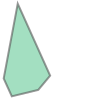

In [20]:
polys[0]

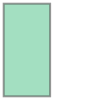

In [21]:
polys[1]

In [22]:
coordinates = []

for i in range(int(units_h * units_v - 1)):
    lat = crop_coordinates[i][0]
    lng = crop_coordinates[i][1]
    coordinate = Point(lat, lng)
    coordinates.append(coordinate)

coordinates

 ...]

In [23]:


_pnts = coordinates
crop_index = list(range(int(units_v * units_h - 1)))
gdf = geopandas.GeoDataFrame(geometry = _pnts, index = crop_index)
gdf_in = gdf.assign(**{key: gdf.within(geom) for key, geom in polys.items()})

# print('-----------------')
# print('coordinates:')
# pprint(coordinates)
# print('-----------------')
# print('-----------------')
# print('crop_index:')
# print(crop_index)
# print('-----------------')

# ---------------------------------
# PLOT POLYGON WITHIN RECTANGULE PROFILE POINTS 
def get_coords_within(gdf_in):
    # gets all true points within
    gdf_in_geo = gdf_in.loc[gdf_in['Farm'] == True].geometry
    
    # get list of coordinates
    lats_in = []
    lons_in = []
    for point in gdf_in_geo:
        lats_in.append(point.x)
        lons_in.append(point.y)
        coords_in = tuples_to_list(list(zip(lats_in, lons_in)))
    # returns list of lists of coordinates
    return coords_in

coords_within = get_coords_within(gdf_in)   
# point_within
plot_coordinates(coords_within)

# ---------------------------------

# ---------------------------------
# # PLOT RECTANGULE PROFILE POINTS 
# def get_coords(gdf):
#     # gets all true points within
#     gdf = gdf.geometry
    
#     # get list of coordinates
#     lats = []
#     lons = []
#     for point in gdf:
#         lats.append(point.x)
#         lons.append(point.y)
#         coords = tuples_to_list(list(zip(lats, lons)))
#     # returns list of lists of coordinates
#     return coords

# coords = get_coords(gdf)   
# # points
# plot_coordinates(coords)
# ---------------------------------




# list_points = get_points_within(gdf)
# type(list_points.iloc[0])


-----------------
Location:
[40.7313, -73.999]
-----------------
Amount of coordinates points: 1449
-----------------
Coordinates List:
[[40.73131587074358, -73.99901112861326],
 [40.73133838338506, -73.99900520975453],
 [40.73133388085672, -73.99900520975699],
 [40.731329378328425, -73.99900520975936],
 [40.73132487580008, -73.99900520976175],
 [40.73132037327176, -73.99900520976415],
 [40.73131587074343, -73.99900520976651],
 [40.731360896026445, -73.99899929089182],
 [40.73135639349815, -73.99899929089464],
 [40.73135189096986, -73.99899929089743],
 [40.731347388441534, -73.99899929090017],
 [40.73134288591322, -73.99899929090303],
 [40.731338383384895, -73.99899929090579],
 [40.73133388085657, -73.99899929090864],
 [40.731329378328276, -73.99899929091141],
 [40.73132487579993, -73.9989992909142],
 [40.7313203732716, -73.998999290917],
 [40.73131587074327, -73.99899929091977],
 [40.73138791119606, -73.99899337202197],
 [40.73138340866778, -73.9989933720252],
 [40.73137890613949, -73

In [24]:
gdf.head()

,geometry
0,POINT (40.73148246429039 -73.99904072284698)
1,POINT (40.73147796176219 -73.99904072284698)
2,POINT (40.73147345923397 -73.99904072284698)
3,POINT (40.73146895670576 -73.99904072284698)
4,POINT (40.73146445417754 -73.99904072284698)


In [25]:
pnts

NameError: name 'pnts' is not defined